In [29]:
from RL import ModelBasedRL
from RL import ModelFreeRL
from RL import GridWorldMDP
from RL import GridWorldEnv
from RL import GridDisplay
from RL import ModelFreeRiskRL
from RL import ProspectAgent
from RL import SimulatedMDP

# Code below is to stop autoscroll in the notebook

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Creating grid world MDP

## - Default is to have -1 reward for each move and no noise meaning if an action is chosen it will be executed unless that actions is not a legal move, in which case the move will lead you to stay in the same grid square.

In [3]:
grid_rows = 4
grid_cols = 4
num_actions = 4
terminal_states = [0, 15]

mdp = GridWorldMDP(grid_rows, grid_cols, num_actions, terminal_states)

# Model based reinforcement learning methods using dynamic programming

In [4]:
# Created instance of class to run model based algorithms.
model_rl = ModelBasedRL()

# Iterative Policy Evaluation under random policy.

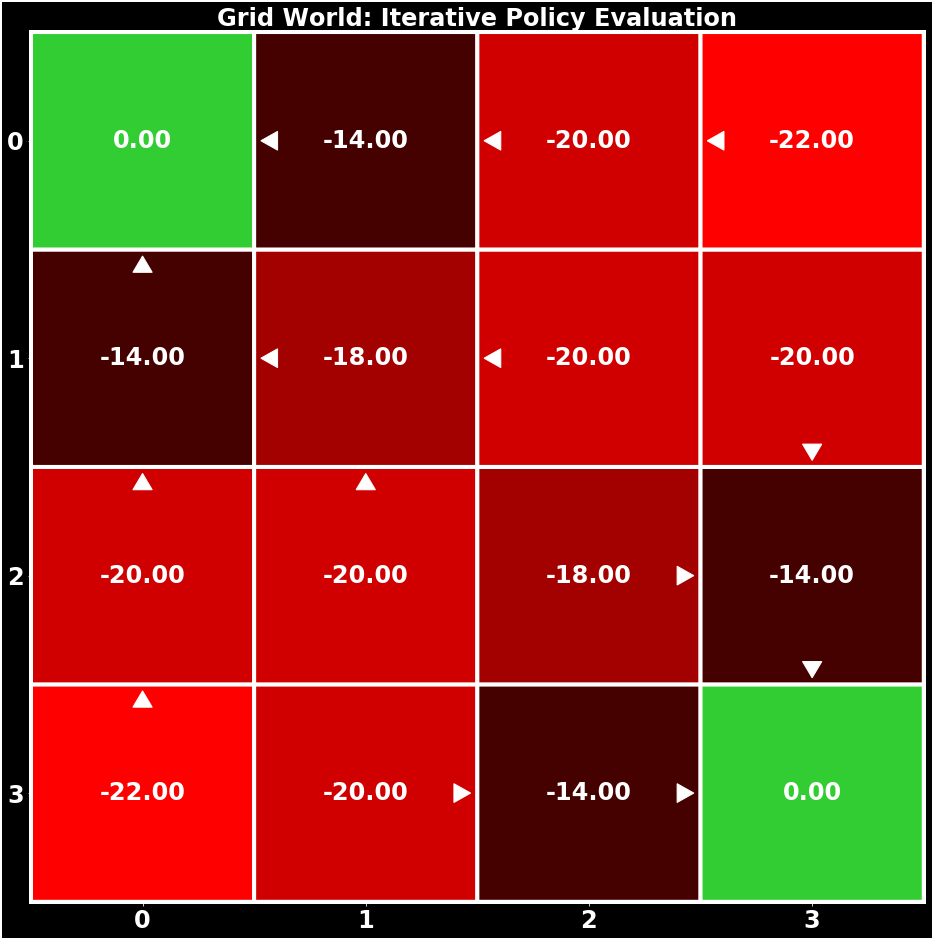

In [5]:
model_rl.iterative_policy_evaluation(mdp)
display = GridDisplay(model_rl, mdp)
display.show_values(title='Grid World: Iterative Policy Evaluation')

# Policy Iteration to find optimal policy and the value function under the optimal policy

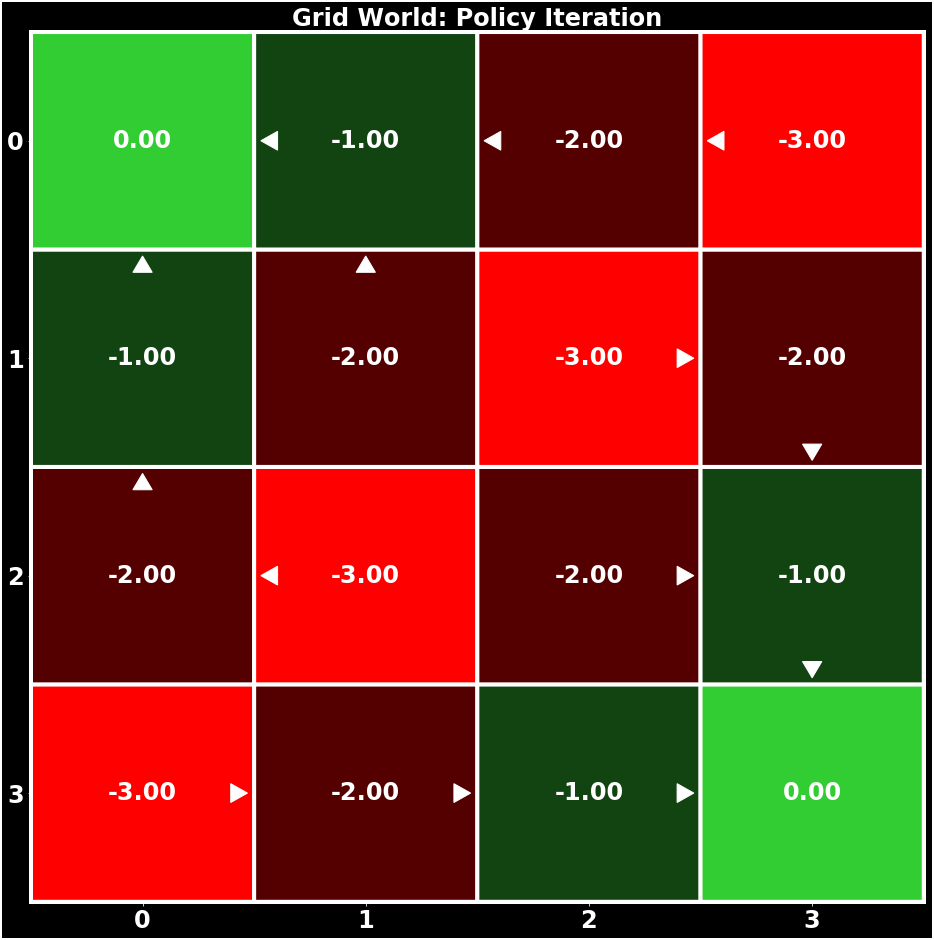

In [6]:
model_rl.policy_iteration(mdp)

display = GridDisplay(model_rl, mdp)
display.show_values(title='Grid World: Policy Iteration')

# Value Iteration

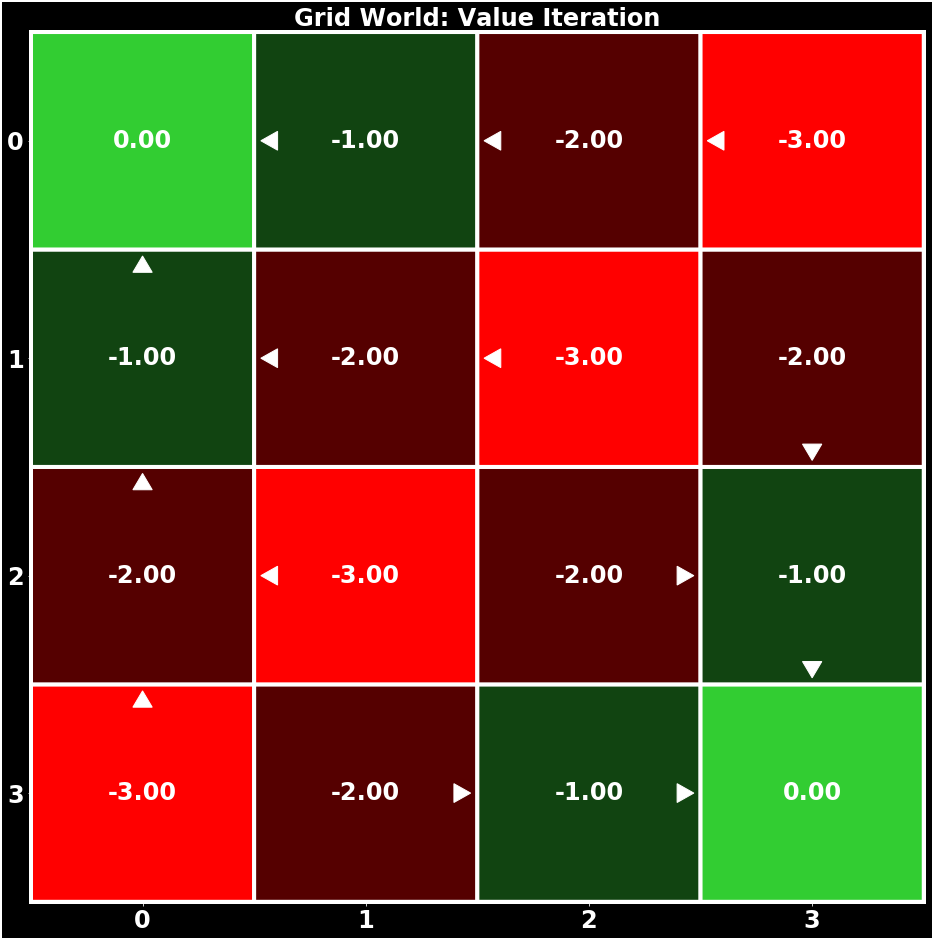

In [7]:
model_rl.value_iteration(mdp)

display = GridDisplay(model_rl, mdp)
display.show_values(title='Grid World: Value Iteration')

# Q-value iteration

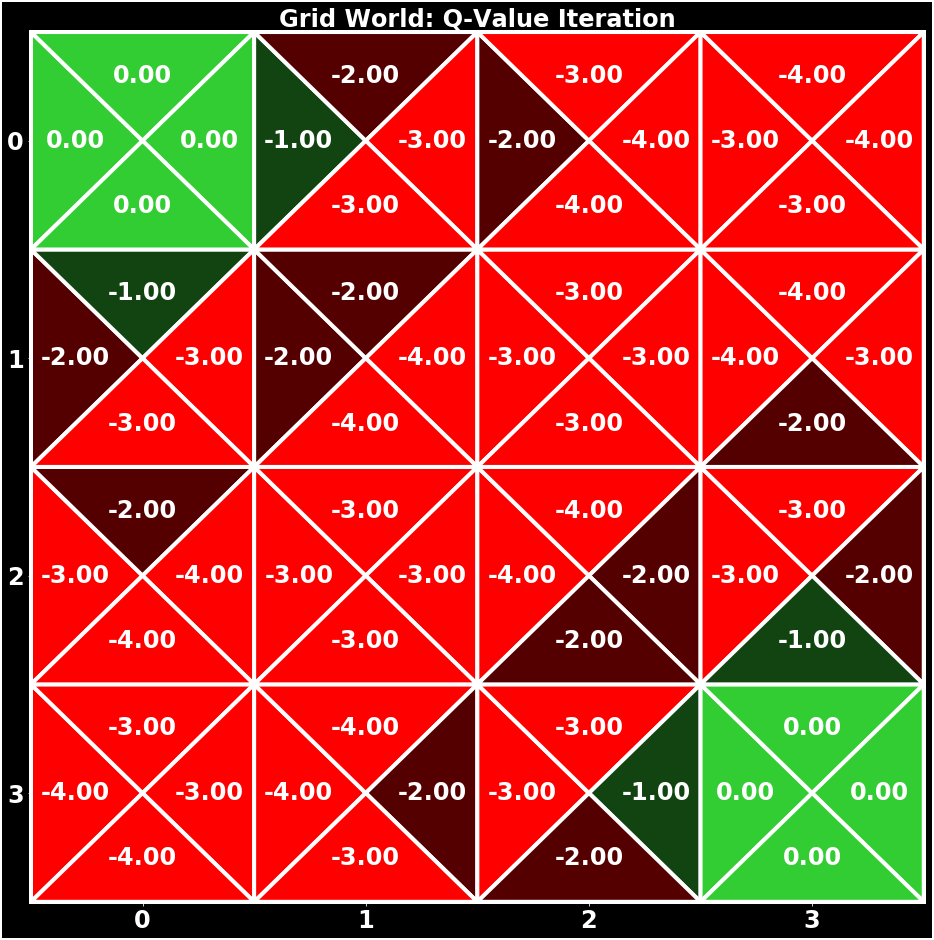

In [8]:
model_rl.q_value_iteration(mdp)
display = GridDisplay(model_rl, mdp)

display.show_q_values(title='Grid World: Q-Value Iteration')

# Model free reinforcement learning using temporal differences

# Creating grid world environment

In [9]:
grid_rows = 4
grid_cols = 4
num_actions = 4
terminal_states = [0, 15]

env = GridWorldEnv(grid_rows, grid_cols, num_actions, terminal_states)

n = env.n
m = env.m
states = env.states
actions = env.actions

# Creating model free instance to run algorithms

In [10]:
# Created instance of class to run model free based algorithms.
model_free_rl = ModelFreeRL(n=n, m=m, states=states, actions=actions)

# Sarsa

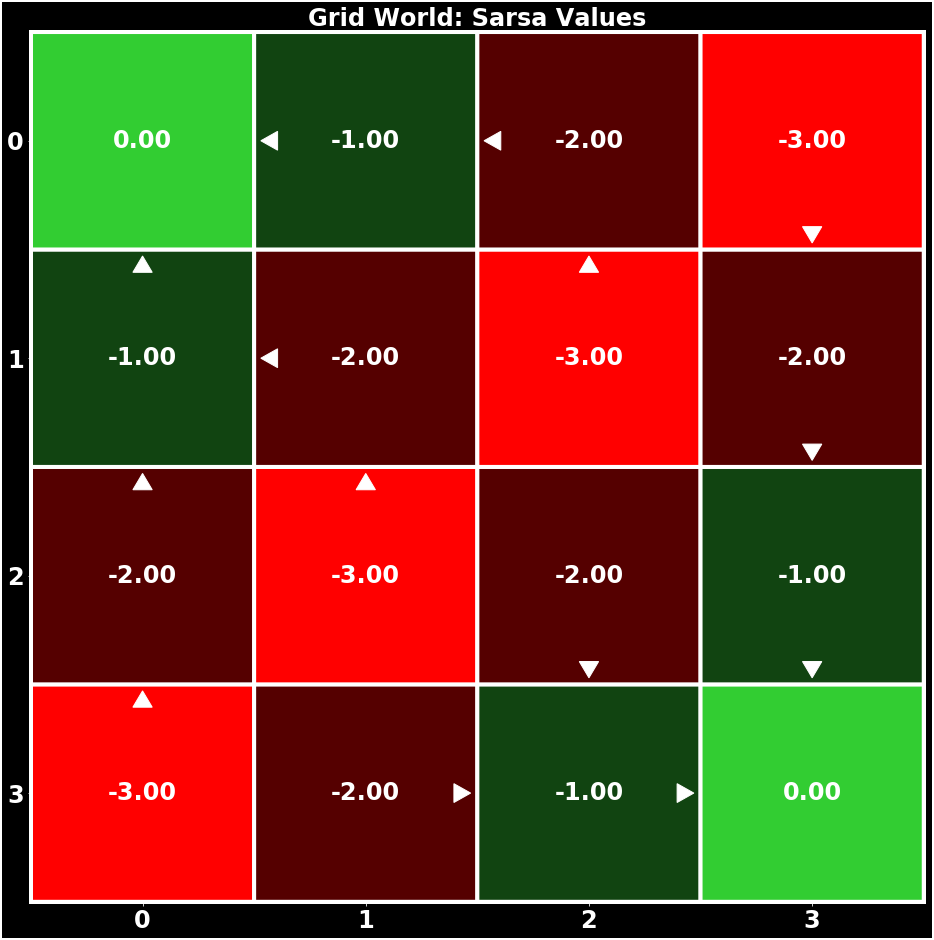

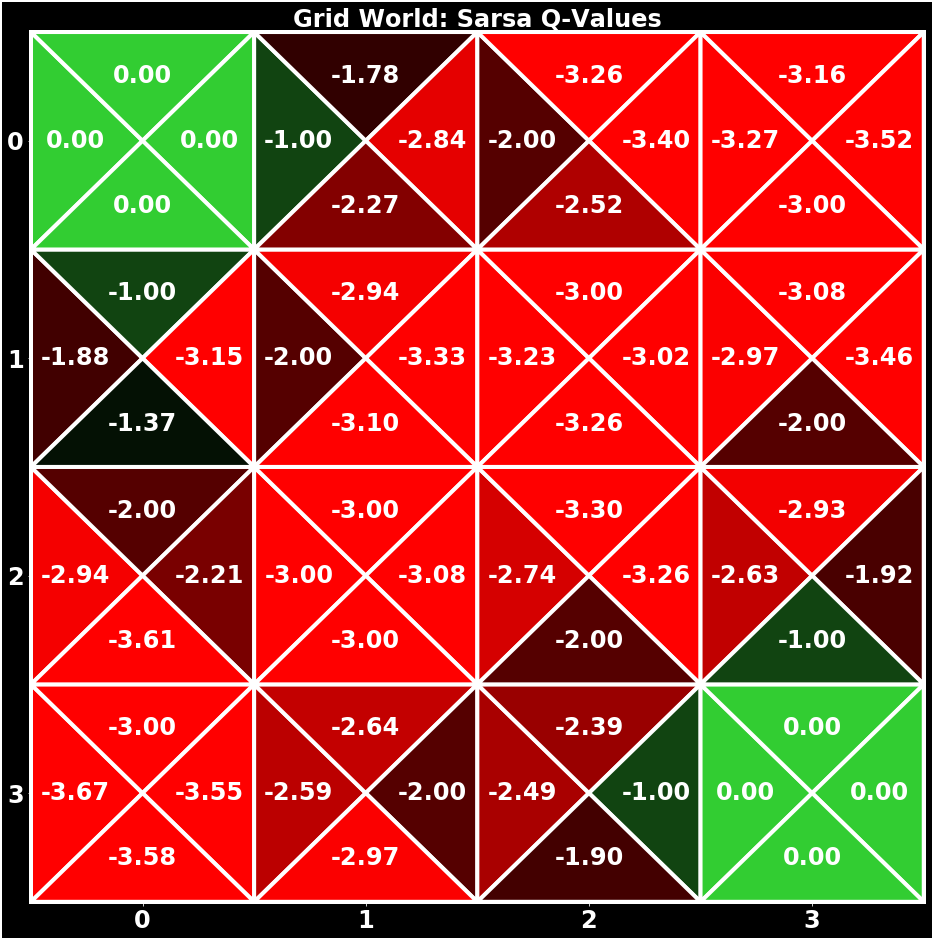

In [11]:
model_free_rl.sarsa(env)

display = GridDisplay(model_free_rl, env)
display.show_values(title='Grid World: Sarsa Values')
display.show_q_values(title='Grid World: Sarsa Q-Values')

# Plotting episode returns and parameters across episodes

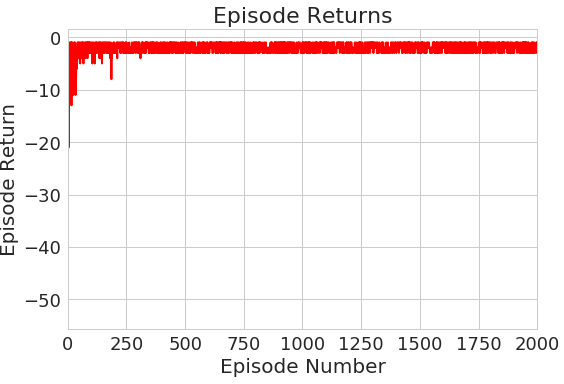

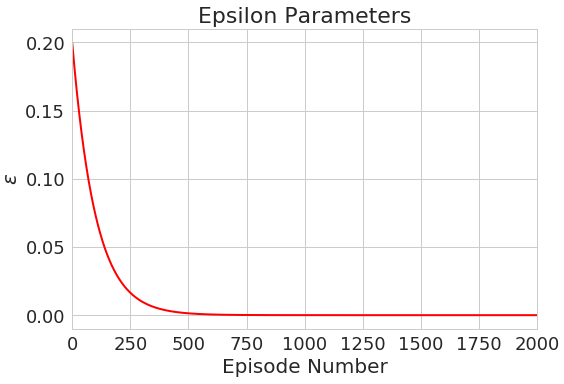

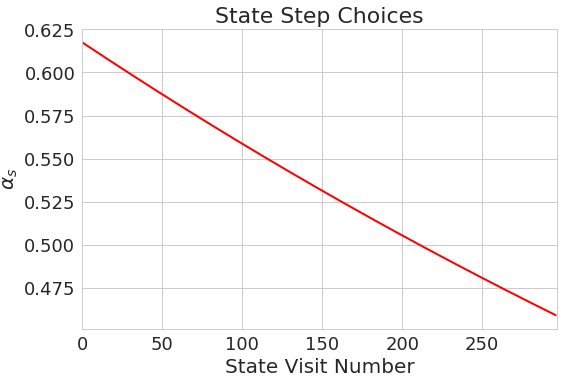

In [12]:
# Plotting the returns at each episode.
model_free_rl.plot_epsiode_returns()

# Plotting the epsilon parameters at each episode.
model_free_rl.plot_epsilon_parameters()

# Plotting the step size parameter for a state.
model_free_rl.plot_alpha_parameters(s=2)

# Q-Learning

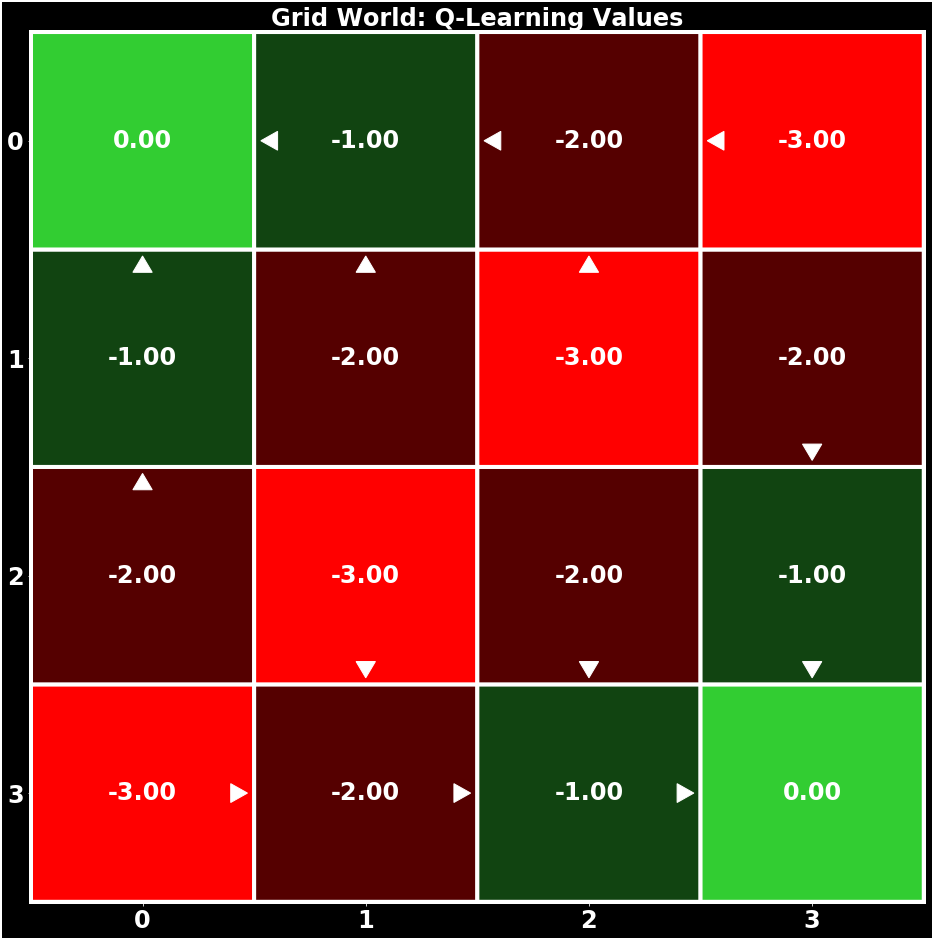

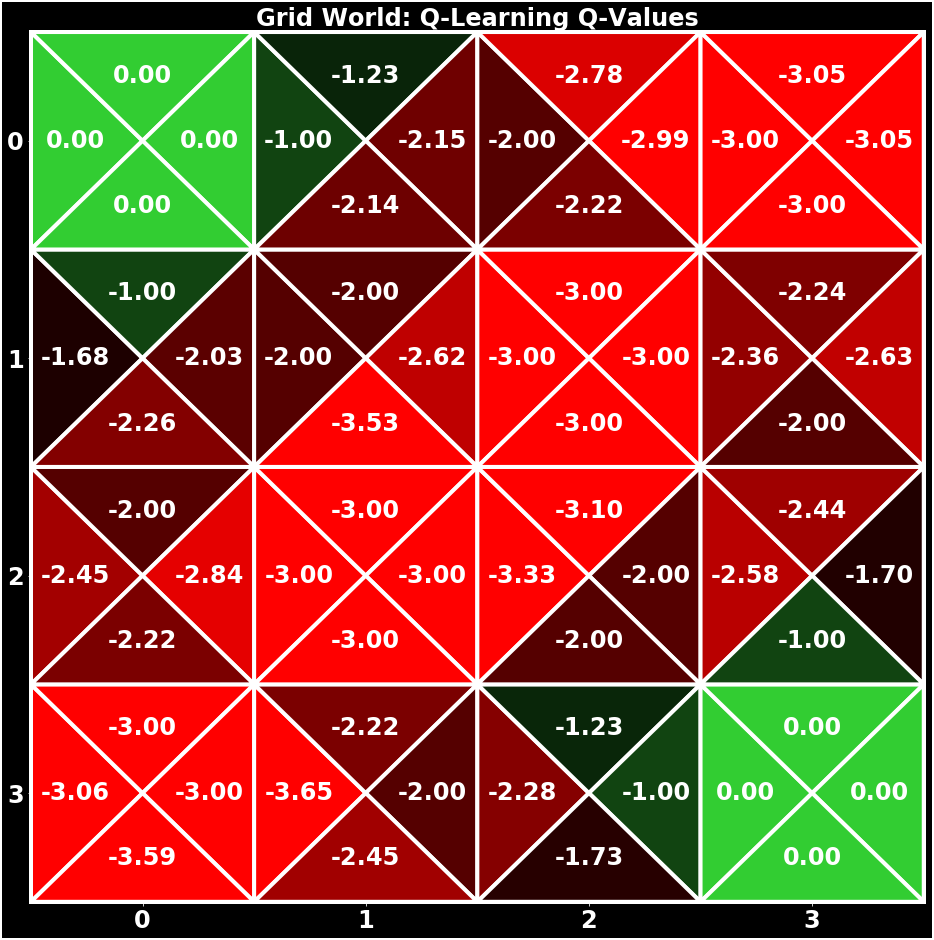

In [13]:
model_free_rl.q_learning(env)

display = GridDisplay(model_free_rl, env)
display.show_values(title='Grid World: Q-Learning Values')
display.show_q_values(title='Grid World: Q-Learning Q-Values')

# Plotting episode returns and parameters across episodes

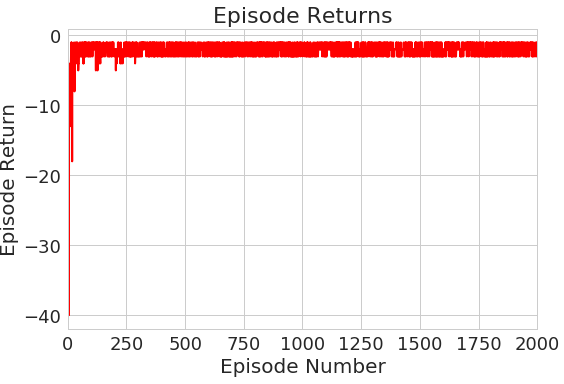

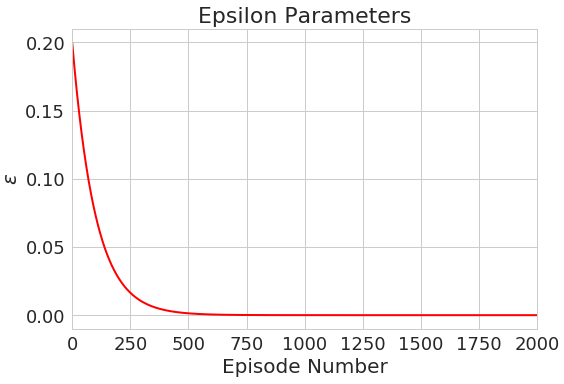

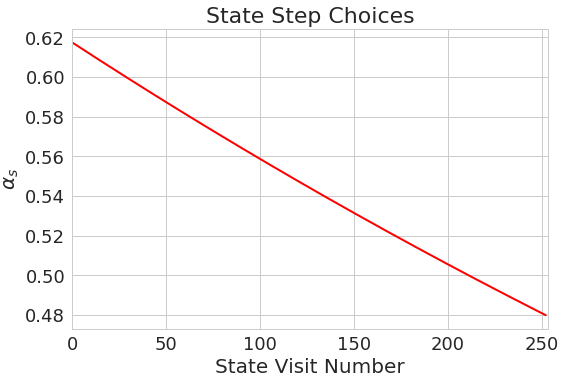

In [14]:
# Plotting the returns at each episode.
model_free_rl.plot_epsiode_returns()

# Plotting the epsilon parameters at each episode.
model_free_rl.plot_epsilon_parameters()

# Plotting the step size parameter for a state.
model_free_rl.plot_alpha_parameters(s=2)

# One Step Temporal Difference
# - Evaluating the value function for the optimal policy learned previously using one step temporal difference

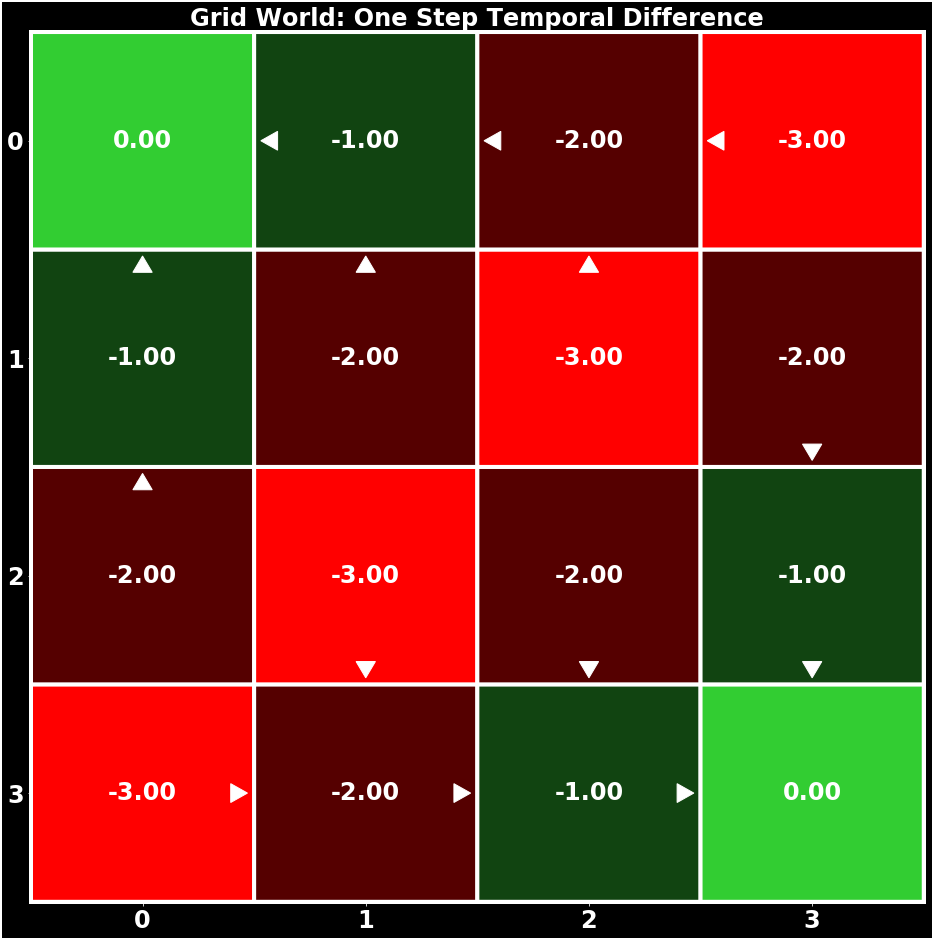

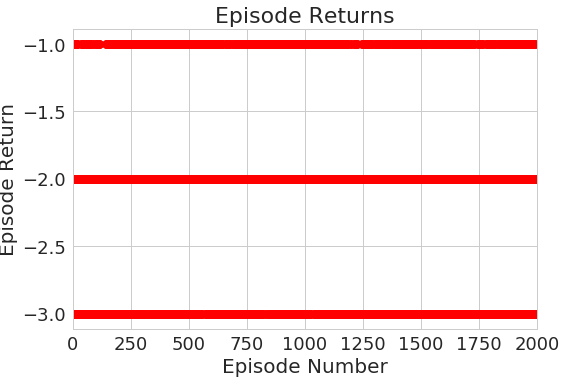

In [15]:
model_free_rl.one_step_temporal_difference(env)

display = GridDisplay(model_free_rl, env)
display.show_values(title='Grid World: One Step Temporal Difference')

# Plotting the returns at each episode.
model_free_rl.scatter_epsiode_returns()

# Creating Noisy Environment - Actions are uncertain

In [16]:
grid_rows = 4
grid_cols = 4
num_actions = 4
terminal_states = [0, 15]

# Rewards will be created with standard deviation of 1.
noise_std = .2

env = GridWorldEnv(grid_rows, grid_cols, num_actions, terminal_states, prob_noise=noise_std)

n = env.n
m = env.m
states = env.states
actions = env.actions

# Q-Learning with Noisy Environenment

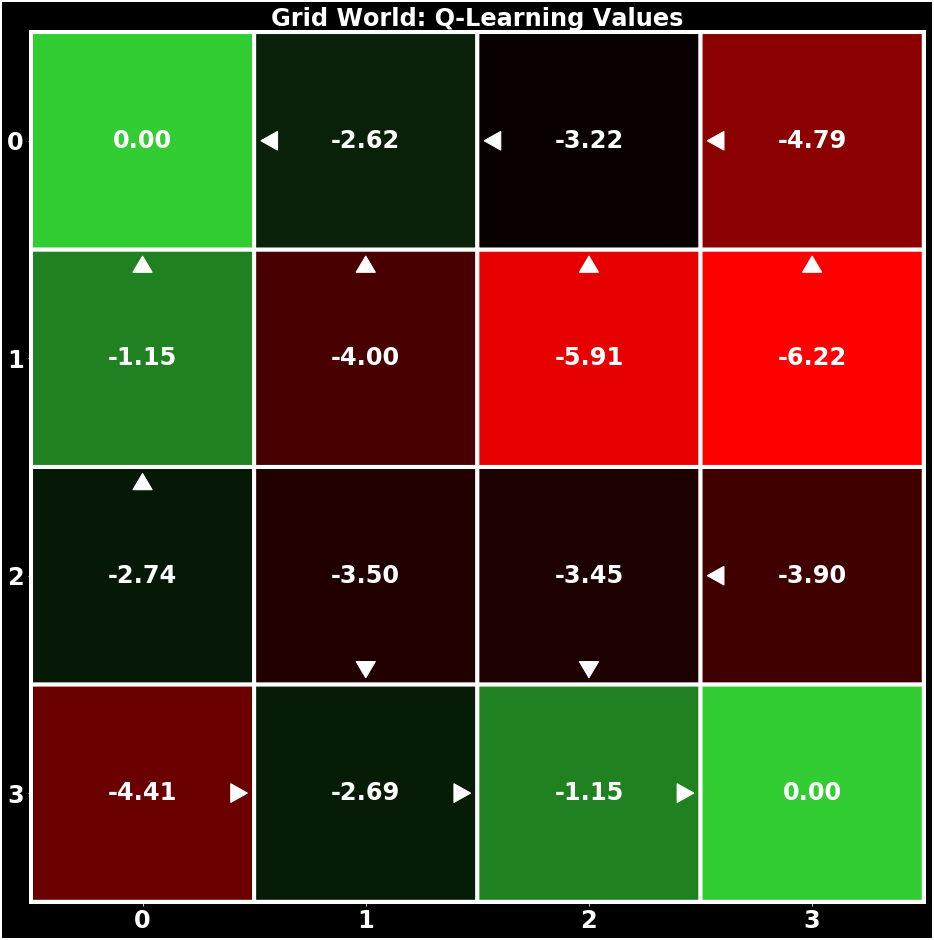

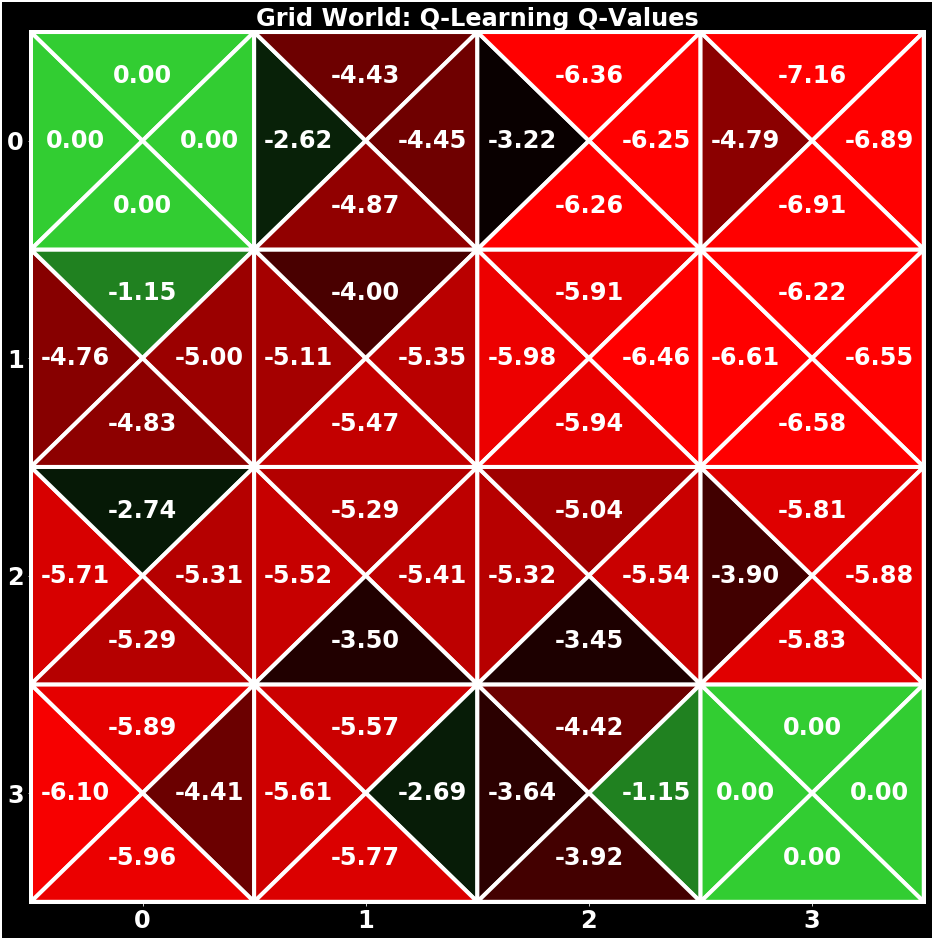

In [17]:
model_free_rl.q_learning(env)

display = GridDisplay(model_free_rl, env)
display.show_values(title='Grid World: Q-Learning Values')
display.show_q_values(title='Grid World: Q-Learning Q-Values')

# Plotting episode returns and parameters across episodes

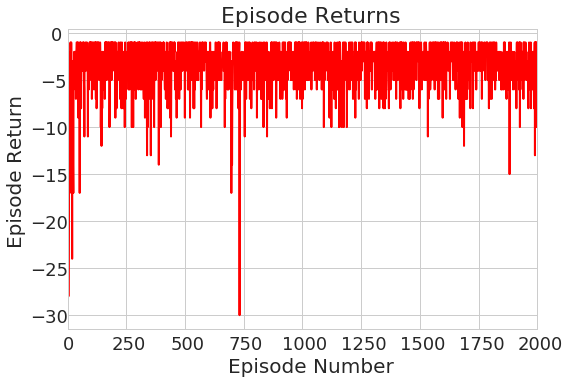

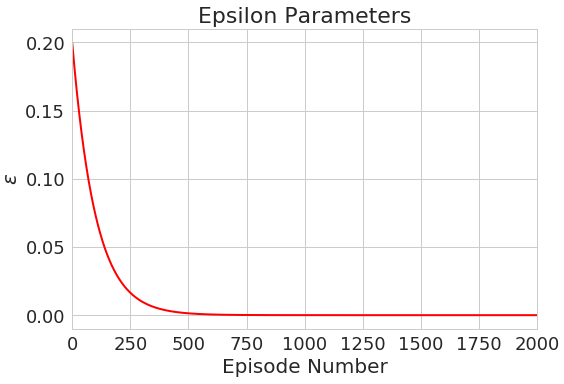

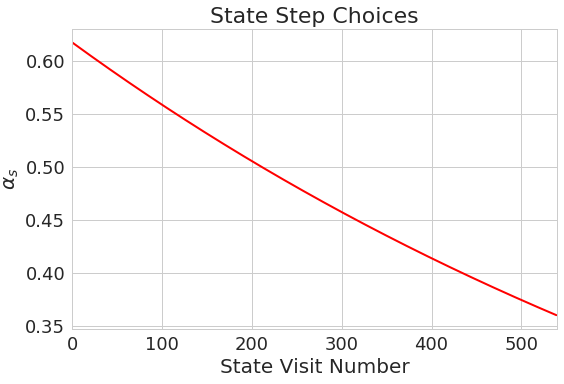

In [18]:
# Plotting the returns at each episode.
model_free_rl.plot_epsiode_returns()

# Plotting the epsilon parameters at each episode.
model_free_rl.plot_epsilon_parameters()

# Plotting the step size parameter for a state.
model_free_rl.plot_alpha_parameters(s=2)

# Creating model free risk object to run risk sensitive learning algorithms

In [19]:
# Created instance of class to run model free based algorithms.
model_free_risk_rl = ModelFreeRiskRL(n=n, m=m, states=states, actions=actions)

# Creating an agent with a prospect value function who is risk adverse in losses and risk neutral in gains

In [20]:
agent = ProspectAgent(rho_plus=.01)

# Risk Sensitive Q-Learning - Mapping of temporal differences

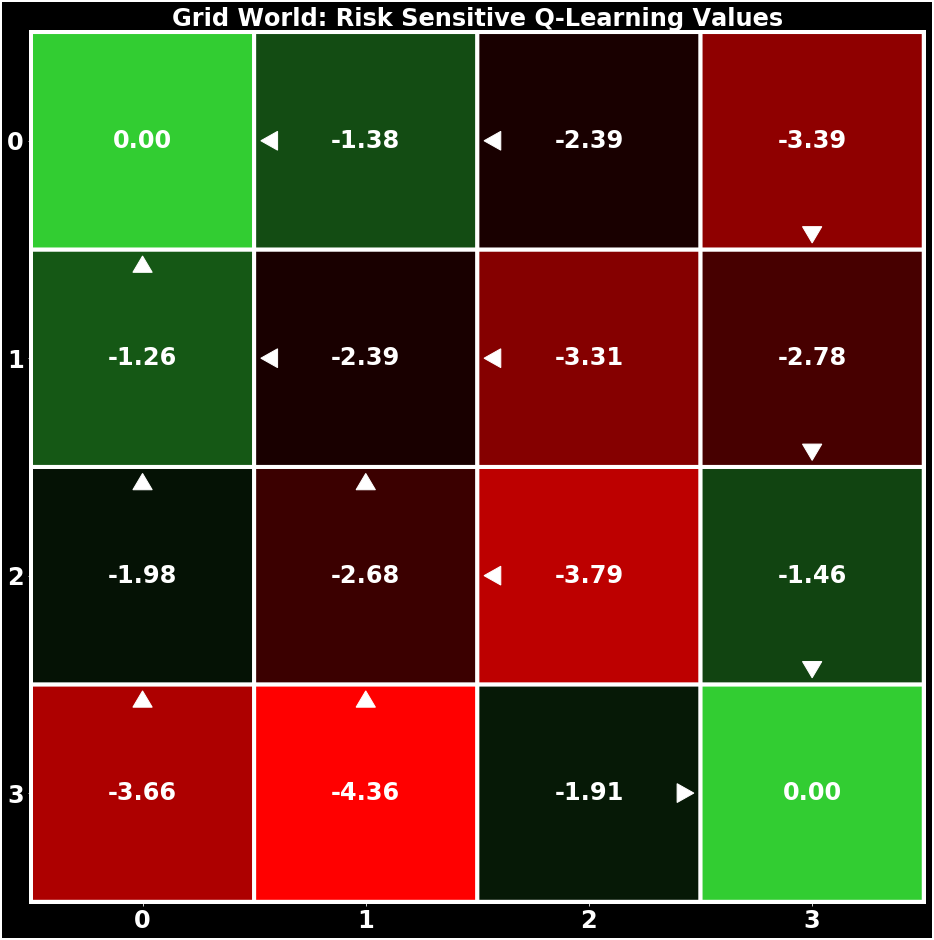

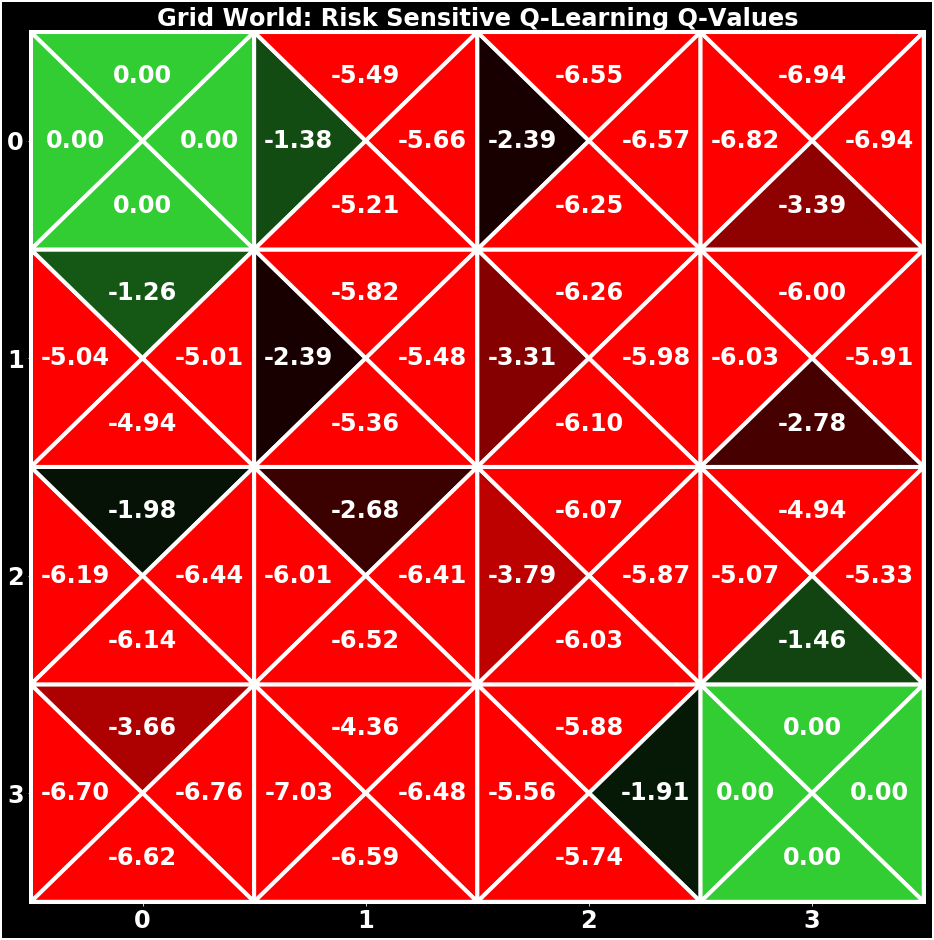

In [21]:
model_free_risk_rl.risk_q_learning(env, agent)

display = GridDisplay(model_free_risk_rl, env)
display.show_values(title='Grid World: Risk Sensitive Q-Learning Values')
display.show_q_values(title='Grid World: Risk Sensitive Q-Learning Q-Values')

# Expected Utility Q-Learning - Mapping of Rewards

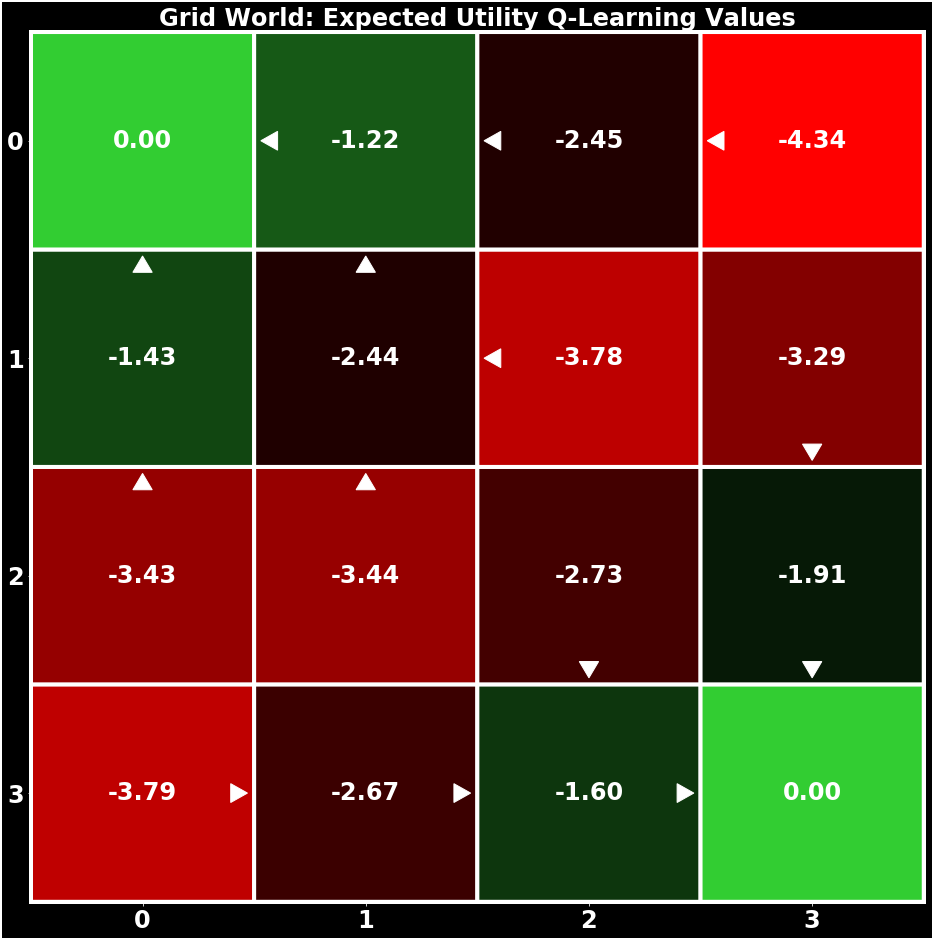

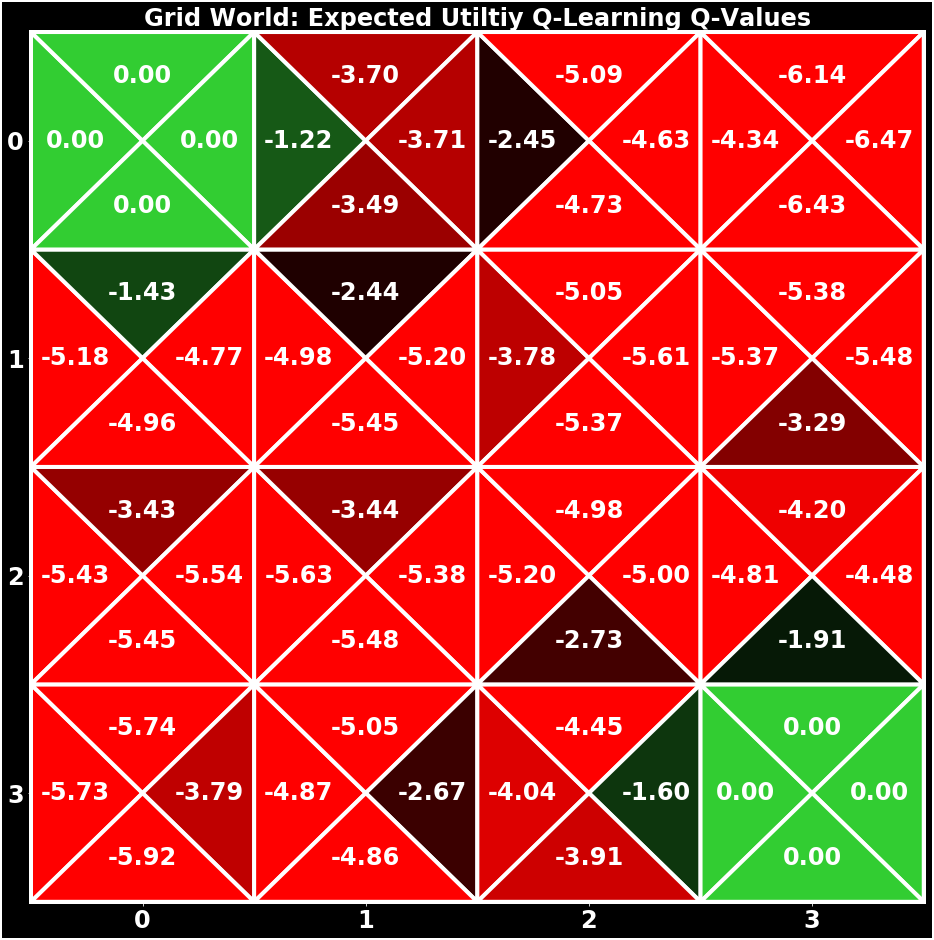

In [22]:
model_free_risk_rl.eu_q_learning(env, agent)

display = GridDisplay(model_free_risk_rl, env)
display.show_values(title='Grid World: Expected Utility Q-Learning Values')
display.show_q_values(title='Grid World: Expected Utiltiy Q-Learning Q-Values')

# Simulating the environment to create MDP from empirical experience

In [27]:
mdp = SimulatedMDP(env)
mdp.grid_rows = grid_rows
mdp.grid_cols = grid_cols
mdp.terminal_states = []

# Running model based reinforcement learning on learned MDP

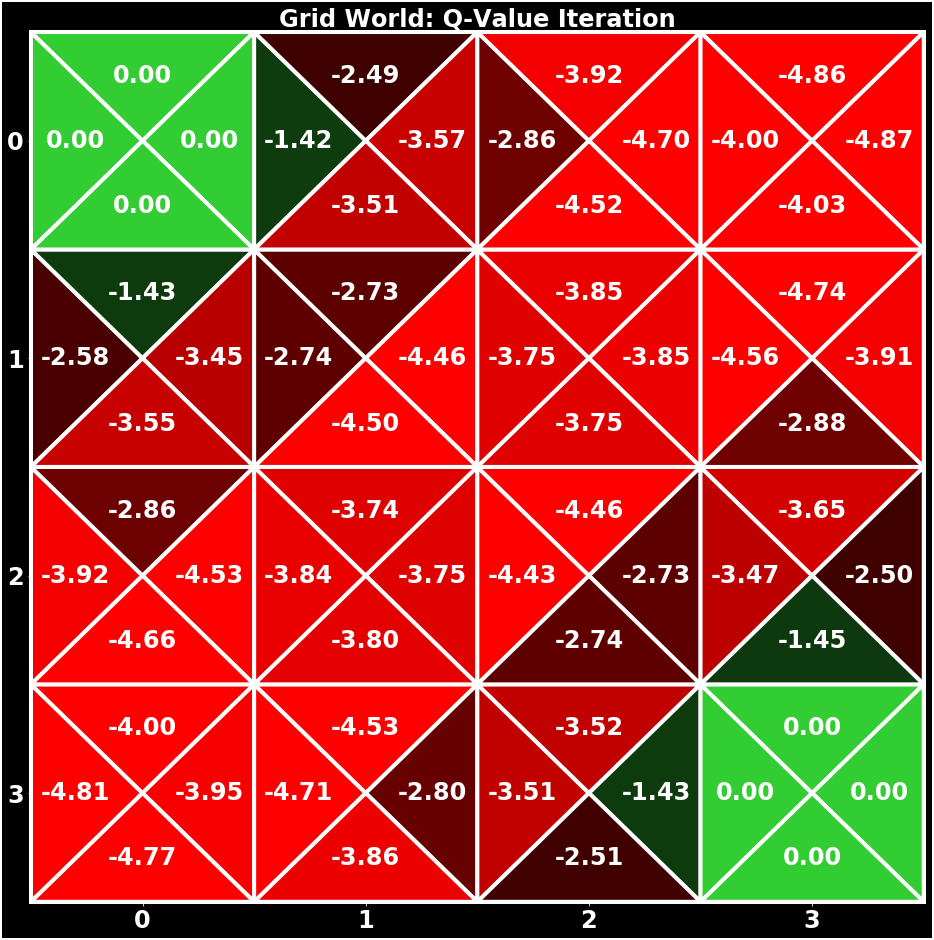

In [28]:
model_rl.q_value_iteration(mdp)
display = GridDisplay(model_rl, mdp)

display.show_q_values(title='Grid World: Q-Value Iteration')